<a href="https://colab.research.google.com/github/gusper01/TP1FIUBA/blob/master/seminarioITBA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [4]:
dftest = pd.read_csv('test.csv')
dftrain = pd.read_csv('train.csv')

# **Análisis Exploratorio**

In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Dftrain Features Numericas y Categoricas 
categorical_features = dftrain.select_dtypes(include = ["object"]).columns
numerical_features = dftrain.select_dtypes(exclude = ["object"]).columns
# Dftest Features Numericas y Categoricas 
categorical_featurest = dftest.select_dtypes(include = ["object"]).columns
numerical_featurest = dftest.select_dtypes(exclude = ["object"]).columns
# Mostrar
print("Conjunto Dftrain")
print("Features Numéricas : " + str(len(numerical_features)))
print("Features Categóricas  : " + str(len(categorical_features)))
print("----------------")
print("Conjunto Dftest")
print("Features Numéricas : " + str(len(numerical_featurest)))
print("Features Categóricas  : " + str(len(categorical_featurest)))


Conjunto Dftrain
Features Numéricas : 38
Features Categóricas  : 43
----------------
Conjunto Dftest
Features Numéricas : 37
Features Categóricas  : 43


**La feature distinta entre train y test es el target en este caso es la variable "SalePrice" que ser corresponde al precio de venta (valor a predecir)**

In [8]:
s = (dftrain.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [9]:
# Valores Nulos/Faltantes Conjunto de Entrenamiento
missing_count = dftrain.isnull().sum()
missing_colse = pd.DataFrame(missing_count).index.tolist()
#missing_count.sort_values(ascending=False) / len(X) * 100
missing_count.sort_values(ascending=False) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

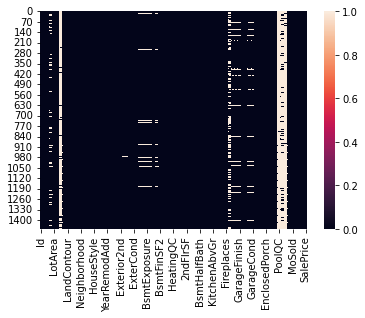

In [10]:
#Mapa de Calor Conjunto de Entrenamiento Valores nulos
sns.heatmap(dftrain.isnull())

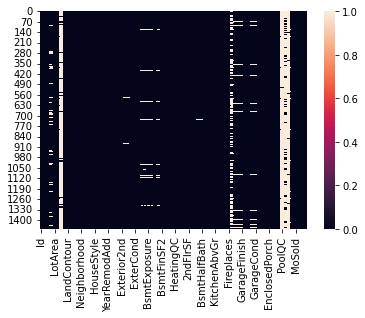

In [11]:
#Mapa de Calor Conjunto de Test Valores nulos
sns.heatmap(dftest.isnull())

In [12]:
dftrain.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
#variables con nulos en Conjunto de Entrenamiento y Test
dftrainNA = dftrain.dropna(axis=1)
dftestNA = dftest.dropna(axis=1)
# sns.heatmap(dftrainNA.isnull())
print("Conjunto Entrenamiento, Cantidad de Columnas con Valores Nulos:", str(dftrainNA.shape[1]))
print("Conjunto Test, Cantidad de Columnas con Valores Nulos         :", str(dftestNA.shape[1]))

Conjunto Entrenamiento, Cantidad de Columnas con Valores Nulos: 62
Conjunto Test, Cantidad de Columnas con Valores Nulos         : 47


In [14]:
# Valores Nulos/Faltantes Conjunto de Entrenamiento
missing_counte = dftrain.isnull().sum()
missing_colse = pd.DataFrame(missing_counte).index.tolist()
#missing_count.sort_values(ascending=False) / len(X) * 100
missing_counte.sort_values(ascending=False) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [15]:
# Valores Nulos/Faltantes Conjunto de Test
missing_count = dftest.isnull().sum()
missing_colst = pd.DataFrame(missing_count).index.tolist()
#missing_count.sort_values(ascending=False) / len(X) * 100
missing_count.sort_values(ascending=False) 

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Foundation        0
Id                0
Length: 80, dtype: int64

**Se observa que en ambos conjuntos las siguientes variables (entre otras) poseen gran cantidad de valores nulos 
"PoolQC" (Pool quality ) (se corresponderian a casas sin piscina)
"MiscFeature" (Misceslaneas) puede contener valores  Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
"Alley (acceso a la propiedad por camino, callejón)
Grvl	Gravel
Pave	Paved
NA 	No alley access        
**



#**Correlación Lineal - Visualización Preliminar**

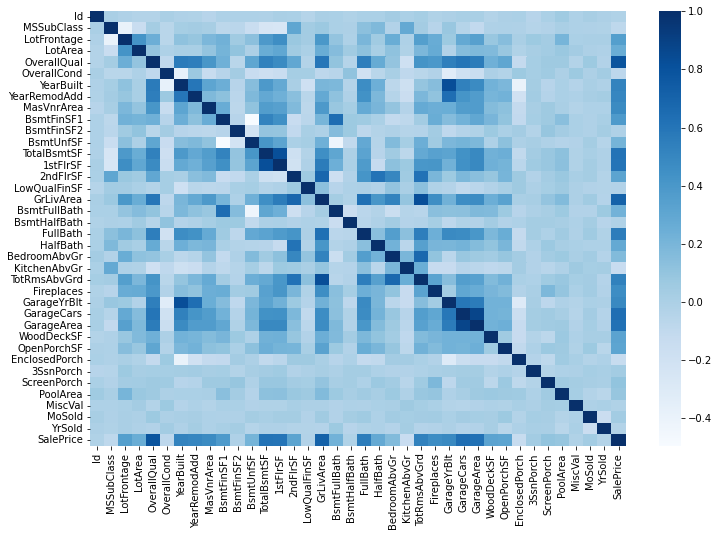

In [16]:
# Matriz de Correlación Lineal del conjunto de Entrenamiento 
corr_matrix = dftrain.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='Blues')

In [17]:
#Correlación con variable Target "SalePrice"
target = "SalePrice"
corr_matrix[target].apply(lambda x: abs(x)).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

Con los datos crudos sin ningun tipo de tratamiento se obseva una correlacion bastante robusta entre la variable target "SalePrice" y:
OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
GrLivArea: Above grade (ground) living area square feet
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet




# **Limpieza De Datos**

Se decide unificar los conjuntos de Entrenamiento y Test para hacer tareas:
Limpieza de Datos, luego se volverán a dividir, para realizar predicción 

In [18]:
#Unificacion de Conjunto de Entrenamiento y Test 
# Para Limpieza de Datos
#Se agrega una columna "conjunto" con valor "0" para dataset de train y 
# "1" para dataset de test. Para reconstruir los dataset originales
# Luego de las acciones de limpieza de datos 
dftrain["Conjunto"]=0
dftest["SalePrice"]= 0 #Para igualar las cantidades de columnas
dftest["Conjunto"]=1 
datasets = [dftrain, dftest]
dataEmasT = pd.concat(datasets)
dataEmasT.shape


(2919, 82)

In [19]:
#Chequeo mínimo -> tipo de campo target
dftrain["SalePrice"].dtypes
dftest["SalePrice"].dtypes 
dataEmasT["SalePrice"].dtypes
print("Sale Price en Entrenamiento       :", str(dftrain["SalePrice"].dtypes))
print("Sale Price en Test                :", str(dftest["SalePrice"].dtypes))
print("Sale Price en Entrenamiento + Test:", str(dftest["SalePrice"].dtypes))

Sale Price en Entrenamiento       : int64
Sale Price en Test                : int64
Sale Price en Entrenamiento + Test: int64


In [20]:
#X = dftrain.copy()
#"y = X.pop("SalePrice")

# Label encoding for categoricals
#for colname in dataEmasT.select_dtypes("object"):
#    dataEmasT[colname], _ = dataEmasT[colname].factorize()
#numerical_featurest = dftest.select_dtypes(exclude = ["object"]).columns
#for colname in X.select_dtypes("object"):
# All discrete features should now have integer dtypes (double-check this before using MI!)
#discrete_features = X.dtypes == int
#discrete_features.head()

#discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
#numerical_featurest
#discrete_features


In [21]:
# Valores nulos en Dataset Unificado dataEmast
missing_countT = dataEmasT.isnull().sum()
missing_colstT = pd.DataFrame(missing_countT).index.tolist()
#missing_count.sort_values(ascending=False) / len(X) * 100
print("Valores nulos en Dataset Unificado dataEmast")
missing_countT.sort_values(ascending=False) 

Valores nulos en Dataset Unificado dataEmast


PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
               ... 
1stFlrSF          0
CentralAir        0
SalePrice         0
Heating           0
Id                0
Length: 82, dtype: int64

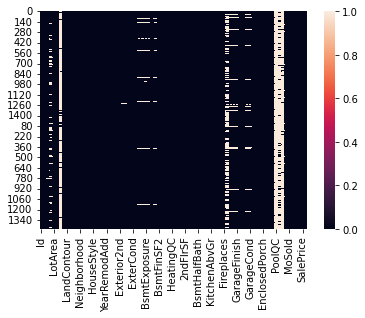

In [22]:
sns.heatmap(dataEmasT.isnull())

In [23]:
dataEmasTNA = dataEmasT.dropna(axis=1)
print("Conjunto Entrenamiento + Test , Cantidad de Columnas con Valores Nulos:", str(dataEmasTNA.shape[1]))

Conjunto Entrenamiento + Test , Cantidad de Columnas con Valores Nulos: 48


In [24]:
#Se decide eliminar la columna ID ya que no posee informacion para
# predecir el target solo indentifica el registro 
dataEmasT.drop("Id", inplace=True, axis=1)

In [25]:
# dataEmasTNA Features Numéricas y Categóricas con valores nulos
categorical_features = dataEmasTNA.select_dtypes(include = ["object"]).columns
numerical_features = dataEmasTNA.select_dtypes(exclude = ["object"]).columns
# Mostrar
print("Conjunto dataEmasTNA features con Valores Nulos")
print("Features Numéricas : " + str(len(numerical_features)))
print("Features Categóricas  : " + str(len(categorical_features)))

Conjunto dataEmasTNA features con Valores Nulos
Features Numéricas : 28
Features Categóricas  : 20


In [26]:
# Se dedide no eliminar variables y asignar "NONE" a las variables Categóricas 
#y "0" a las numéricas. Se podria profundizar para indentificar mejor a las variables
# por ejemplo analizando la cardinalidad de los variables categóricas 
#para seleccionar una tecnica de Feature enginnering como por ejemplo one_hot_encoding 
#  si es una cardinalidad baja. Por razones de tiempo para continuar con las otras 
# actividades del PIPELINE, se dedice imputar los valores nulos usando 
# un procedimiento genérico
categorical_features = dataEmasT.select_dtypes(include = ["object"]).columns
numerical_features = dataEmasT.select_dtypes(exclude = ["object"]).columns
 #   num_cols = df.select_dtypes(include=np.number).columns
 #   cat_cols = df.select_dtypes(exclude=np.number).columns
for col in numerical_features:
    dataEmasT[col] = dataEmasT[col].fillna(dataEmasT[col].median())
for col in categorical_features:
    dataEmasT[col] = dataEmasT[col].fillna('NONE')
dataEmasT.isnull().sum



<bound method DataFrame.sum of       MSSubClass  MSZoning  LotFrontage  ...  SaleCondition  SalePrice  Conjunto
0          False     False        False  ...          False      False     False
1          False     False        False  ...          False      False     False
2          False     False        False  ...          False      False     False
3          False     False        False  ...          False      False     False
4          False     False        False  ...          False      False     False
...          ...       ...          ...  ...            ...        ...       ...
1454       False     False        False  ...          False      False     False
1455       False     False        False  ...          False      False     False
1456       False     False        False  ...          False      False     False
1457       False     False        False  ...          False      False     False
1458       False     False        False  ...          False      False     Fal

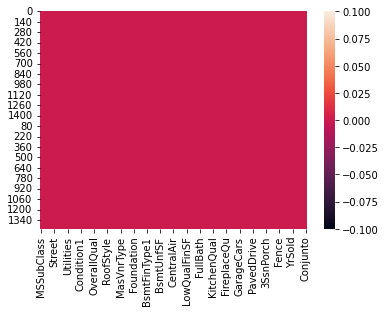

In [27]:
#Se visualiza con Mapa de Calor que se hayan eliminado los valores nulos
sns.heatmap(dataEmasT.isnull())

In [28]:
#Volvemos a generar los conjuntos de Entrenamiento y Test
TrainClean = dataEmasT[dataEmasT.Conjunto == 0]
TestClean = dataEmasT[dataEmasT.Conjunto == 1]
print("Conjunto Entrenamiento, Cantidad de Filas y Columnas :", str(TrainClean.shape))
print("Conjunto Test, Cantidad de Filas y Columnas          :", str(TestClean.shape))

Conjunto Entrenamiento, Cantidad de Filas y Columnas : (1460, 81)
Conjunto Test, Cantidad de Filas y Columnas          : (1459, 81)


In [29]:
#Eliminamos la columna target "SalePrice"  en Conjunto de Test y la columna "Conjunto"
#en ambos conjuntos
TestClean.drop(["SalePrice","Conjunto"], inplace=True, axis=1)
#TestClean.drop("Conjunto", inplace=True, axis=1)
TrainClean.drop("Conjunto", inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
print("Conjunto Entrenamiento, Cantidad de Filas y Columnas :", str(TrainClean.shape))
print("Conjunto Test, Cantidad de Filas y Columnas          :", str(TestClean.shape))

Conjunto Entrenamiento, Cantidad de Filas y Columnas : (1460, 80)
Conjunto Test, Cantidad de Filas y Columnas          : (1459, 79)


18


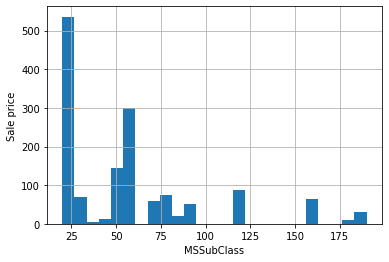

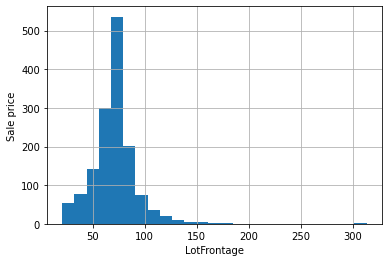

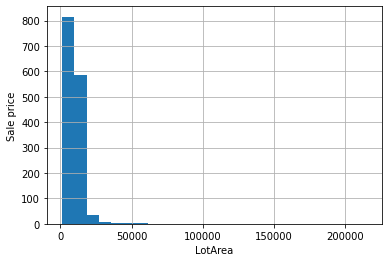

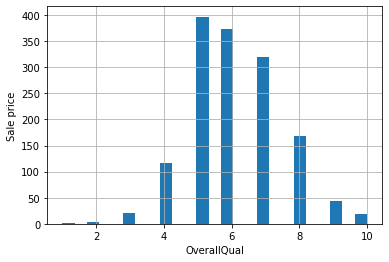

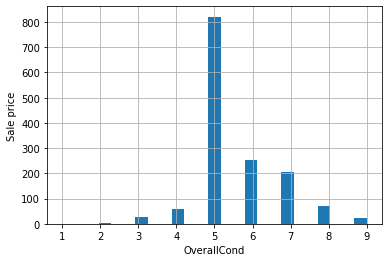

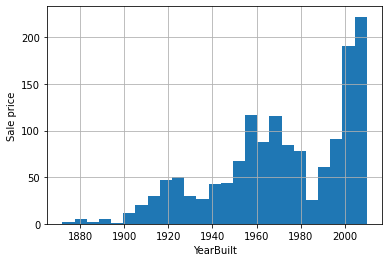

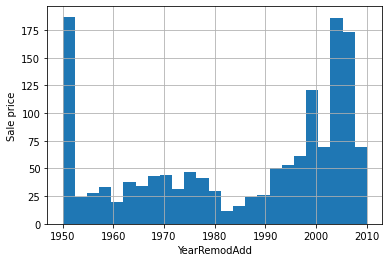

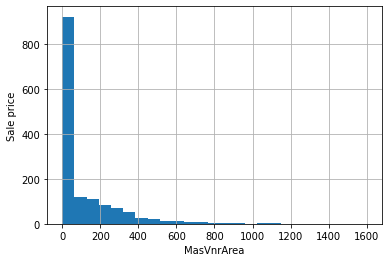

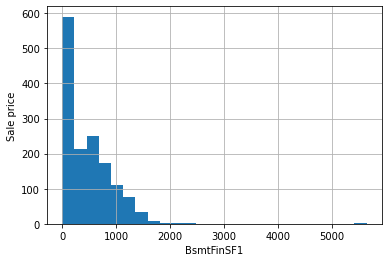

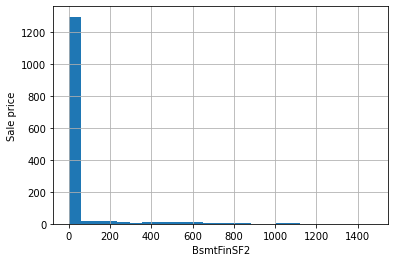

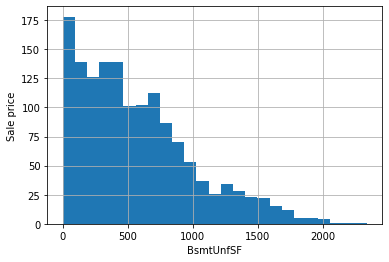

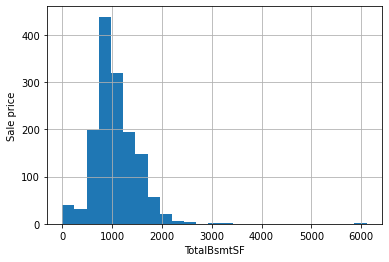

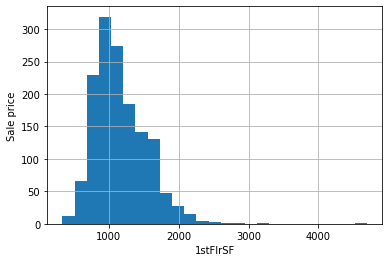

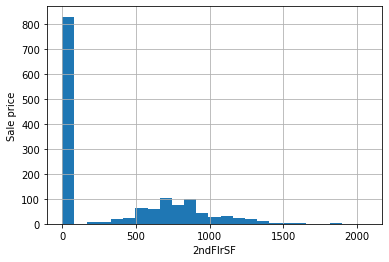

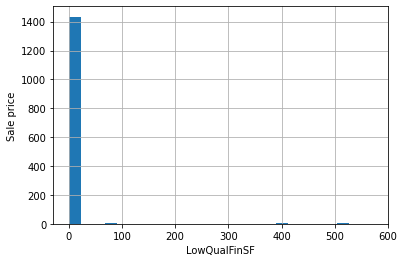

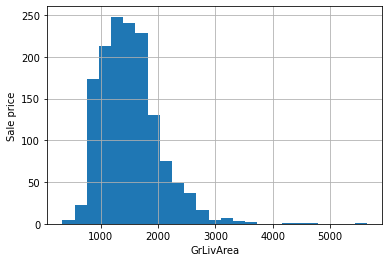

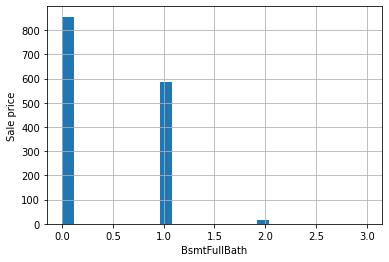

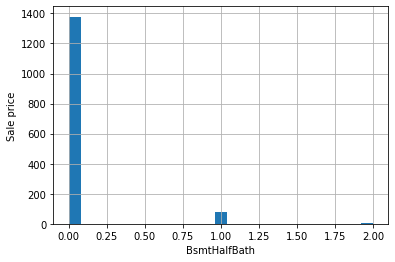

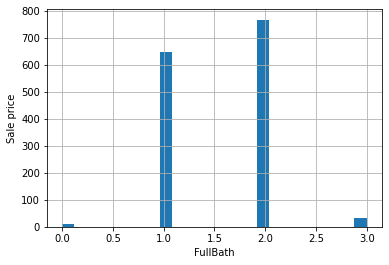

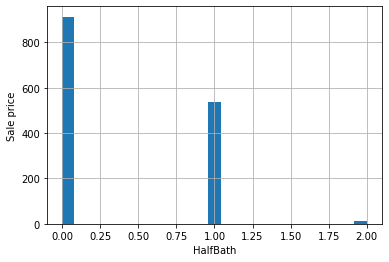

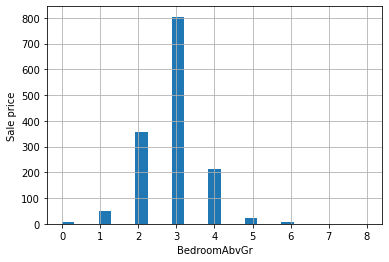

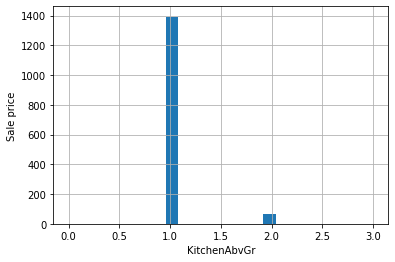

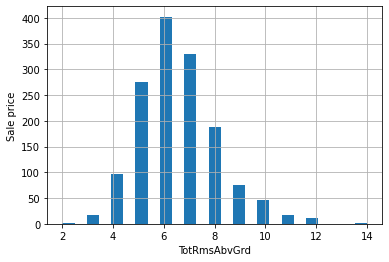

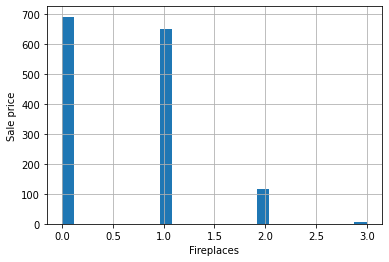

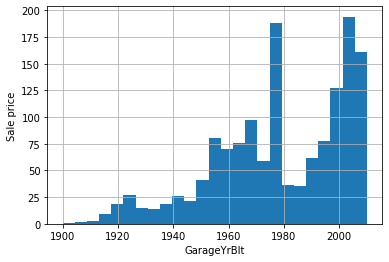

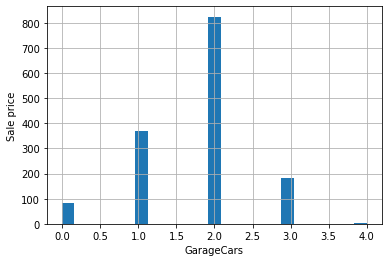

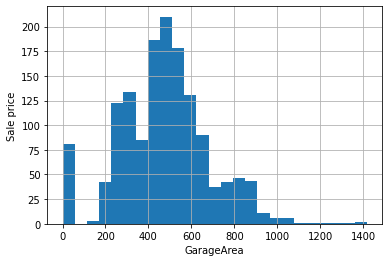

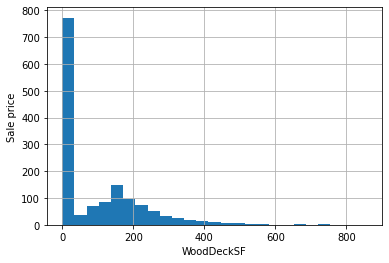

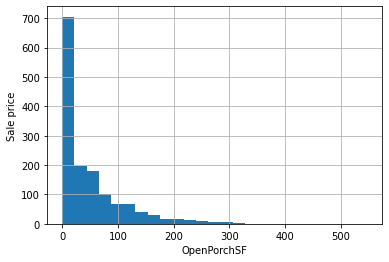

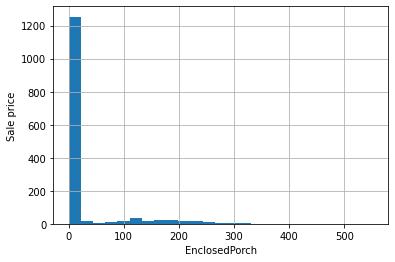

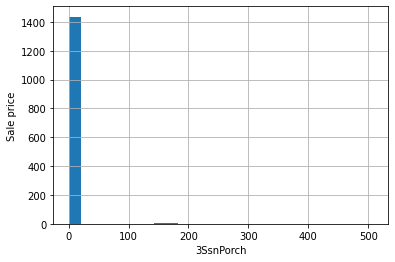

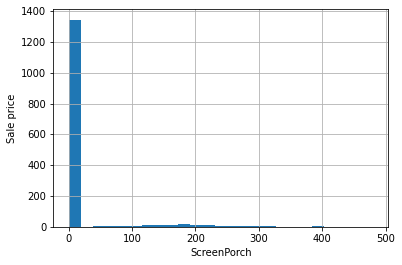

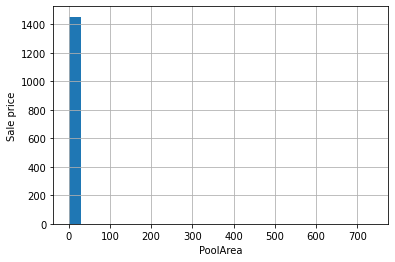

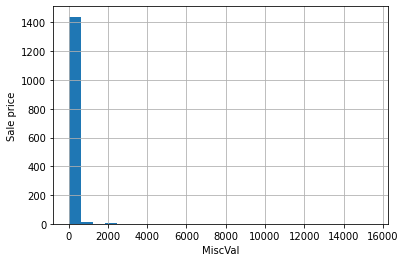

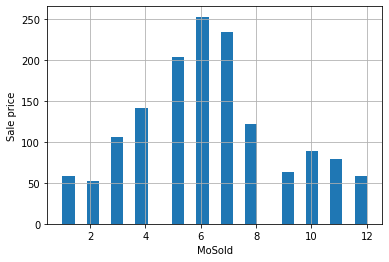

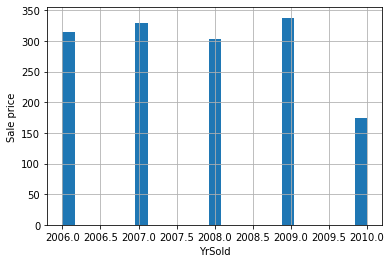

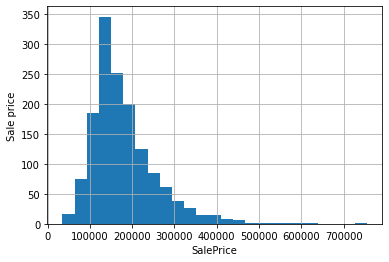

In [31]:
# Conjunto de Entrenamiento TrainClean - Features Numéricas y Categóricas 
cat_featClean = TrainClean.select_dtypes(include = ["object"]).columns
num_featClean = TrainClean.select_dtypes(exclude = ["object"]).columns
dis_featClean=[feature for feature in num_featClean if len(TrainClean[feature].unique())<25]
print(len(dis_featClean))
for feature in num_featClean:              
  
    TrainClean[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Sale price')
    plt.show()

Se puede observar que muchas variables poseen valores no distribuidos de forma normal, se decidira luego normalizar o usar un clasificador que no lo requiera  tan necesario por ejemplo XGBOOST

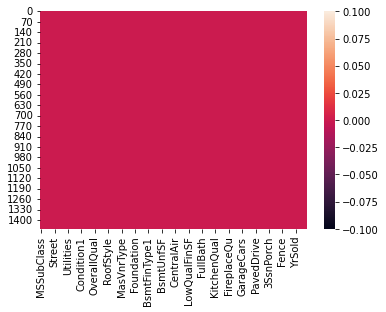

In [32]:
#Es importante chequear que no haya nulos porque puede ser explicitamente necesario según
# el algoritmo que usuemos para modelar 
sns.heatmap(TrainClean.isnull())

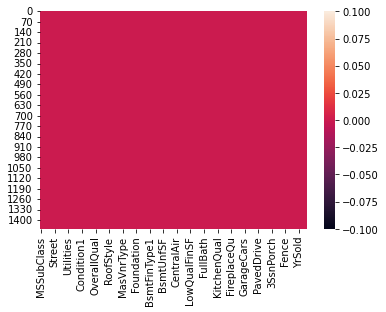

In [33]:
sns.heatmap(TestClean.isnull())

In [34]:
print("Sale Price en TrainClean       :", str(TrainClean["SalePrice"].dtypes))

Sale Price en TrainClean       : int64


# **Label Encoding y Baseline**

In [35]:
# Se genera un Baseline para medir el modelo 
# Utilizando Xbgoost se requiere realizar label enconding 
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
# Funcion de Modelado 
import xgboost as xgb
#from sklearn.grid_search import GridSearchCV
from xgboost import plot_importance

def score_data(X, y, model=XGBRegressor(objective ='reg:squarederror')):
 
  for colname in X.select_dtypes("object", "category"):
    X[colname], _ = X[colname].factorize()
  discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
  for colname in X.select_dtypes(["category"]):
    X[colname] = X[colname].cat.codes
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
  log_y = np.log(y)
  score = cross_val_score(
  model, X, log_y, cv=5, scoring="neg_mean_squared_error",
  )
  score = -1 * score.mean()
  score = np.sqrt(score)
  return score 

def modeloXGBoost(X, y):
#xgbr=xgb.XGBRegressor(base_score=0.3,colsample_bylevel=1,colsample_bytree=0.7, 
#gamma=0,learning_rate=0.05,max_depth=6,min_child_weight=2,n_estimators=1040,
#reg_alpha=0.1,reg_lambda=0.05,subsample=0.7)
  for colname in X.select_dtypes("object", "category"):
    X[colname], _ = X[colname].factorize()
  discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
  for colname in X.select_dtypes(["category"]):
    X[colname] = X[colname].cat.codes
  xgbr = XGBRegressor(objective ='reg:squarederror')
  xgbr.fit(X,y)
 # ojo agregar test para modelar!!! xgbr_y_predict=xgbr.predict(x_test)
  plot_importance(xgbr, max_num_features=20, title = 'Top 20 Features Importances')
  plt.figure(figsize=(800,1600))
  plt.show()
# Guardar por las dudas parametros XGBOOST !!!
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
#learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [36]:
# Baseline Score - Función Scoring
X = TrainClean.copy()
y = X.pop("SalePrice")
baseline_score = score_data(X,y)
print(f"Baseline score: {baseline_score:.5f} RMSLE")


Baseline score: 0.13257 RMSLE


A los efectos de medir los modelos que se vayan desarrollando se crea un BASELINE en este caso con XGBOOST y una funcion de scoring con RMSLE (es lo pedido en la competencia de kaggle original y es usual como métrica en problemas de regresión)

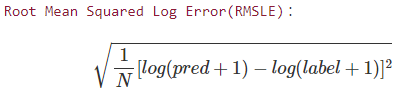

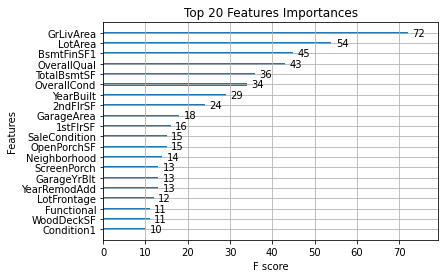

<Figure size 57600x115200 with 0 Axes>

In [37]:
# XGBoost Features Importance
X = TrainClean.copy()
y = X.pop("SalePrice")
modeloXGBoost(X, y)

Luego de limpiar datos y aplicar el baseline se observa utilizando las herramientas de ploteo de xgboost para python (plot importance) 
se pueden ver las variables con mayor feature importance. Esto se refiere a cuales son las mas útiles para predecir la variable target.
Se identifican las siguientes variables  en orden de importancia
*   GarageYrBlt: Year garage was built
*   LotArea: Lot size in square feet
*   OverallQual: Rates the overall material and finish of the house
*   TotalBsmtSF: Total square feet of basement area
*   OverallCond: Rates the overall condition of the house
*   ....








# **Feature Engineering**

# Mutual Information (Información Mutua)
Se va a utilizar la métrica de Informacion Mutua. Se parece mucho a la correlación en el sentido de que mide la relación entre dos cantidades. La ventaja de la información mutua es que puede detectar cualquier tipo de relación, mientras que la correlación solo detecta relaciones lineales. Es fácil de usar e interpretar, resistente al overfitting y capaz de detectar cualquier tipo de relación. 
Intuitivamente, la información mutua media mide la información que X e Y comparten: mide en cuánto el conocimiento de una variable reduce nuestra incertidumbre sobre la otra. Por ejemplo, si X e Y son independientes, entonces conocer X no da información sobre Y y viceversa, por lo que su información mutua es cero. En el otro extremo, si X e Y son idénticas entonces toda información proporcionada por X es compartida por Y: saber X determina el valor de Y y viceversa. Por ello, la información mutua media es igual a la información contenida en Y (o X) por sí sola, también llamada la entropía de Y (o X: claramente si X e Y son idénticas tienen idéntica entropía
 https://es.m.wikipedia.org/wiki/Informaci%C3%B3n_mutua
 
# Scores de utilidad de Features

In [38]:
# Baseline con  MI
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
def score_mi(X,y):
  # A las variables categóricas les aplico Label Encoding
  for colname in X.select_dtypes("object", "category"):
      X[colname], _ = X[colname].factorize()
  # Todas las variables discretas deberian ser int
  discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores
#  for colname in X.select_dtypes(["category"]):
#    X[colname] = X[colname].cat.codes


In [39]:
# Scores Mutual Information
X = TrainClean.copy()
y = X.pop("SalePrice")
mi_scores = score_mi(X, y)
print(mi_scores.head(20))
#print(mi_scores.tail(20))  # uncomment to see ultimas 20 

OverallQual     0.571457
Neighborhood    0.526220
GrLivArea       0.430395
YearBuilt       0.407974
LotArea         0.394468
TotalBsmtSF     0.368536
GarageArea      0.361542
GarageCars      0.352312
BsmtQual        0.330803
KitchenQual     0.324679
ExterQual       0.324003
GarageYrBlt     0.298933
1stFlrSF        0.282503
MSSubClass      0.281349
YearRemodAdd    0.274032
FullBath        0.263217
GarageFinish    0.262469
FireplaceQu     0.218161
LotFrontage     0.216374
GarageType      0.211553
Name: MI Scores, dtype: float64


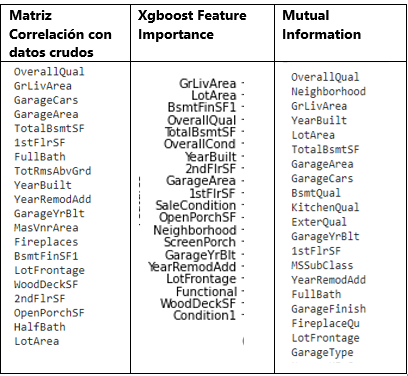

In [40]:
#MI eliminar features uninformative 
def drop_uninformative(df, mi_scores):
  return df.loc[:, mi_scores > 0.000000e+00]


In [41]:
#Prueba de Eliminación de Columnas MI = 0.0
X = TrainClean.copy()
XcolOld = X.shape[1]
y = X.pop("SalePrice")
Xmi = drop_uninformative(X,mi_scores)
print("columnas Originales = ", XcolOld)
print("columnas con MI mayor a 0.0 = ", Xmi.shape[1])
print("Sale Price en TrainClean       :", str(TrainClean["SalePrice"].dtypes))
#print("Sale Price en X       :", str(X["SalePrice"].dtypes))
#print("Sale Price en Xmi       :", str(Xmi["SalePrice"].dtypes))


columnas Originales =  80
columnas con MI mayor a 0.0 =  74
Sale Price en TrainClean       : int64


In [42]:
print("Sale Price en TrainClean       :", str(TrainClean["SalePrice"].dtypes))


Sale Price en TrainClean       : int64


In [43]:
# Baseline Score - Función Scoring
X = TrainClean.copy()
y = X.pop("SalePrice")
X = drop_uninformative(X, mi_scores)
baseline_score = score_data(X,y)
print(f"Baseline score MI: {baseline_score:.5f} RMSLE")


Baseline score MI: 0.13300 RMSLE


**Al eliminar las columnas con Mutual Information = 0.0 
y Ejecutar el Baseline el RMSLE aumenta levemente! por lo que se decide al momento de modelar no se eliminaran columnas con valores bajos de Mutual Information**

# **Creación de Features**
  


In [44]:
X.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SaleType,SaleCondition
0,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706.0,0,0.0,150.0,856.0,0,0,0,0,856,854,0,1710,1.0,0.0,2,1,3,1,0,8,0,0,0,0,2003.0,0,2.0,548.0,0,0,0,0,61,0,0,0,0,0,0,0
1,20,0,80.0,9600,0,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978.0,0,0.0,284.0,1262.0,0,0,0,0,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,0,1,1,0,1976.0,0,2.0,460.0,0,0,0,298,0,0,0,0,0,0,0,0
2,60,0,68.0,11250,0,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486.0,0,0.0,434.0,920.0,0,0,0,0,920,866,0,1786,1.0,0.0,2,1,3,1,0,6,0,1,1,0,2001.0,0,2.0,608.0,0,0,0,0,42,0,0,0,0,0,0,0
3,70,0,60.0,9550,0,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216.0,0,0.0,540.0,756.0,0,1,0,0,961,756,0,1717,1.0,0.0,1,0,3,1,0,7,0,1,2,1,1998.0,1,3.0,642.0,0,0,0,0,35,272,0,0,0,0,0,1
4,60,0,84.0,14260,0,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655.0,0,0.0,490.0,1145.0,0,0,0,0,1145,1053,0,2198,1.0,0.0,2,1,4,1,0,9,0,1,1,0,2000.0,0,3.0,836.0,0,0,0,192,84,0,0,0,0,0,0,0


In [45]:
# Counts
X = TrainClean.copy()
y = X.pop("SalePrice") 
X["PorchTypes"] = X[[
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
    ]].gt(0.0).sum(axis=1)
baseline_score = score_data(X,y)
print(f"Baseline score FC1: {baseline_score:.5f} RMSLE")


Baseline score FC1: 0.13271 RMSLE


In [46]:
X["PorchTypes"].dtypes

dtype('int64')

In [47]:
# Counts 2
X = TrainClean.copy()
y = X.pop("SalePrice") 
#X["LivLotRatio"] = X.GrLivArea / X.LotArea
X["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")
baseline_score = score_data(X,y)
print(f"Baseline score FC1: {baseline_score:.5f} RMSLE")


Baseline score FC1: 0.13199 RMSLE


In [48]:
# Counts 3
X = TrainClean.copy()
y = X.pop("SalePrice") 
#X["GrLivAreaR2"] = np.sqrt(TrainClean.GrLivArea)
#X["X.LotAreaR2"] = np.sqrt(TrainClean.LotArea)
# X["LivLotRatio"] = np.sqrt(X.GrLivArea) / np.sqrt(X.LotArea)
X["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")
X["PorchTypes"] = X[[
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
    ]].gt(0.0).sum(axis=1)
baseline_score = score_data(X,y)
print(f"Baseline score FC1: {baseline_score:.5f} RMSLE")


Baseline score FC1: 0.13214 RMSLE


In [49]:
# Baseline Score - Función Scoring
X = TrainClean.copy()
y = X.pop("SalePrice")
X = drop_uninformative(X, mi_scores)
baseline_score = score_data(X,y)
print(f"Baseline score MI: {baseline_score:.5f} RMSLE")


Baseline score MI: 0.13300 RMSLE


# **Hyperparameter Tuning**
A los fines del TP esta actividad no se realizó de forma práctica
pero debería estar en un ciclo de pipeline productivo ya que es 
clave. Se puede implementar con una función que optimice los parámetros. Los parametros se refieren entre otras características a:
Cantidad de Hojas, Produndidad, iteracciones, tipo de validacion, escalamiento, 
Se puede utilizar optimizacion bayesiana para hacer la búsqueda de los mejores parametros. En esta caso que se utiliza XGBOOST con PYTHON se puede utilizar 
HYPEROT, también se puede probar manualmente. Los algoritmos de boosting se procesan de forma secuencial para la generacion de cada arbol
y en gral. requieren mucho hardaware comprometido y muchas veces es conveniente realizarlo utilizando un servicio en la nube 


# **Creación del Modelo**

Se utilizará solo el algoritmo XGBoost por limitaciones de tiempo, puede que un modelo de regresión lineal funcione mejor.


In [69]:
X_train = TrainClean.copy()
X_test = TestClean.copy()
X_test["SalePrice"] = 0
y_train = TrainClean.loc[:,"SalePrice"]

X_test["SalePrice"].dtypes
X_train["SalePrice"].dtypes
#y_train["SalePrice"].dtypes


dtype('int64')

In [92]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import xgboost as xgb

#Creo features
TrainClean["MedNhbdArea"] = TrainClean.groupby("Neighborhood")["GrLivArea"].transform("median")
TestClean["MedNhbdArea"] = TestClean.groupby("Neighborhood")["GrLivArea"].transform("median")
#Copio Dataset originales
X_train = TrainClean.copy()
X_test = TestClean.copy()
dftest2 = pd.read_csv('test.csv')
X_test["SalePrice"] = 0
#X_test["SalePrice"] = 0
y_train = TrainClean.loc[:,"SalePrice"]
#.y_train["SalePrice"] = TrainClean["SalePrice"]

# Encoding, todos los set de datos (Entrenamiento y Test)
for colname in X_train.select_dtypes("object", "category"):
  X_train[colname], _ = X_train[colname].factorize()
discrete_features = [pd.api.types.is_integer_dtype(t) for t in X_train.dtypes]
for colname in X_train.select_dtypes(["category"]):
  X_train[colname] = X_train[colname].cat.codes
# TEST
for colname in X_test.select_dtypes("object", "category"):
  X_test[colname], _ = X_test[colname].factorize()
discrete_features = [pd.api.types.is_integer_dtype(t) for t in X_test.dtypes]
for colname in X_test.select_dtypes(["category"]):
  X_test[colname] = X_test[colname].cat.codes

#xgbr = xgb.XGBRegressor()
xgbr = xgb.XGBRegressor(objective ='reg:squarederror')
#xgb = XGBRegressor(**xgb_params)
# Paso a Array de Numpy para que coincidan las columnas
train_x = X_train.values
test_x = X_test.values

#xgbr.fit(X_train, np.log(y_train))
xgbr.fit(train_x, np.log(y_train))

#X_test = np.exp(X_test)
#predictions = xgbr.predict(X_test)
predictions = xgbr.predict(test_x)
#diccionario = {"PSalePrice": predictions}

#dataoutput["SalePrice"] = dataoutput.columns.map(diccionario)

#output = pd.DataFrame({'Id': TestX_test.index, 'SalePrice': predictions})
#If you go to output/submission.csv, you'll notice that the Id starts at 0. 
#Then look at input/sample_submission.csv and notice that it's Id starts at 1461,
#which is what the competition is expecting. The original test data starts at 1461. 
#What likely happened is that you lost the original Id numbers in the test 
#DataFrame used to write the output. You can fix it like this:
#Se usa "dftest2" para recuperar los index ID
output = pd.DataFrame({'Id': dftest2["Id"], 'SalePrice': predictions})
output.to_csv('my_submission4.csv', index=False)
print("Your submission was successfully saved!")
data_alloutput = [dftest2, output]
export = pd.concat(data_alloutput)
export.to_csv('datatotal.csv', index= False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Your submission was successfully saved!


In [80]:
output.shape

(1459, 2)